First the area detector and motor are setup along with the bluesky environment from a python setup file. A laser device is also setup allowing the tracking of the IDs of the laser pulses. This setup file could also include custom plans designed for this experimental setup.

In [1]:
from ophyd_hardware_setup import *

Deferred pause acknowledged. Continuing to checkpoint.


We can set the detector acquisition time (and other variables):

In [2]:
det.cam.stage_sigs["acquire_time"] = 0.01

A scan can then be run. This first example scans in 11 steps between -180° and +180°.



Transient Scan ID: 1     Time: 2024-04-12 14:48:54
Persistent Unique Scan ID: '816c4a3e-d3e3-4687-9c92-bbdffe797305'
New stream: 'primary'
+-----------+------------+------------+-----------------+
|   seq_num |       time |     motor1 | laser1_pulse_id |
+-----------+------------+------------+-----------------+
|         1 | 14:49:17.4 |   -180.000 |    447381566787 |
|         2 | 14:49:20.2 |   -144.000 |    447381566816 |
|         3 | 14:49:22.9 |   -108.000 |    447381566843 |
|         4 | 14:49:25.6 |    -72.000 |    447381566870 |
|         5 | 14:49:28.3 |    -36.000 |    447381566897 |
|         6 | 14:49:31.0 |      0.000 |    447381566924 |
|         7 | 14:49:33.7 |     36.000 |    447381566951 |
|         8 | 14:49:36.4 |     72.000 |    447381566978 |
|         9 | 14:49:39.1 |    108.000 |    447381567005 |
|        10 | 14:49:41.8 |    144.000 |    447381567032 |
|        11 | 14:49:44.5 |    180.000 |    447381567059 |
+-----------+------------+------------+--------

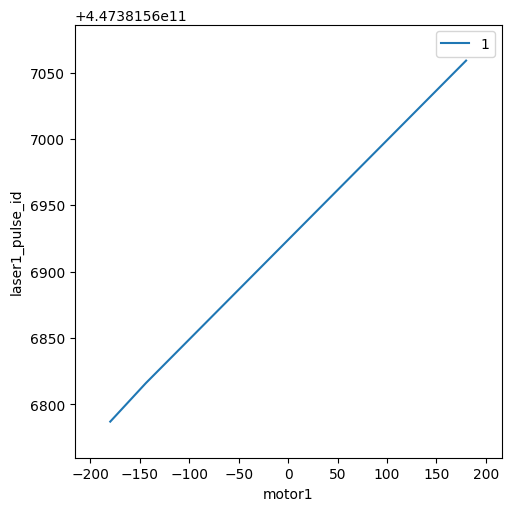

In [3]:
uids = RE(scan([det,laser1], motor1, -180, 180, 11))

To access the data stored in the databroker catalog run the following:

In [5]:
run = catalog[uids[0]] #Accesses the run based on its uid, the most recent run can also be accessed as catalog[-1]
#run = catalog[-1] accesses last scan
data = run.primary.read()
data

<xarray.Dataset>
Dimensions:               (time: 11, dim_0: 1, dim_1: 492, dim_2: 656)
Coordinates:
  * time                  (time) float64 1.713e+09 1.713e+09 ... 1.713e+09
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    motor1                (time) float64 -180.0 -144.0 -108.0 ... 144.0 180.0
    motor1_user_setpoint  (time) float64 -180.0 -144.0 -108.0 ... 144.0 180.0
    laser1_pulse_id       (time) float64 4.474e+11 4.474e+11 ... 4.474e+11
    det_image             (time, dim_0, dim_1, dim_2) uint8 169 167 ... 13 15

The image data is accessed as shown below.

In [6]:
image = data["det_image"]
frame = image[0][0]  
#Index 1 refers to the time of the image and the second index refers to the frame number
frame

<xarray.DataArray 'det_image' (dim_1: 492, dim_2: 656)>
array([[169, 167, 168, ...,  12,  12,  12],
       [158, 165, 158, ...,  12,  13,  12],
       [153, 159, 153, ...,  12,  13,  13],
       ...,
       [ 32,  35,  36, ...,  12,  13,  13],
       [ 31,  35,  37, ...,  12,  12,  12],
       [ 33,  35,  35, ...,  13,  13,  12]], dtype=uint8)
Coordinates:
    time     float64 1.713e+09
Dimensions without coordinates: dim_1, dim_2
Attributes:
    object:   det

Alternatively the image can be viewed graphically:

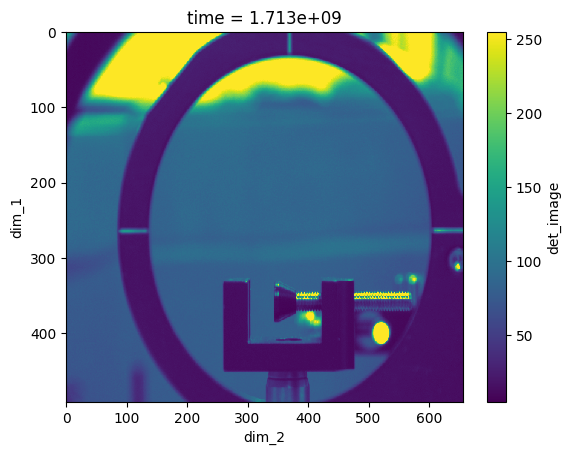

In [7]:
frame.plot(yincrease=False)

Scans can also be interrupted. Let's start a scan:



Transient Scan ID: 2     Time: 2024-04-12 14:50:56
Persistent Unique Scan ID: '32ec8c2c-d9ec-478e-ac62-9bce0dd54240'
New stream: 'primary'
+-----------+------------+------------+-----------------+
|   seq_num |       time |     motor1 | laser1_pulse_id |
+-----------+------------+------------+-----------------+
|         1 | 14:50:56.7 |    180.000 |    447381567780 |
|         2 | 14:50:58.3 |    162.000 |    447381567797 |
|         3 | 14:50:59.9 |    144.000 |    447381567813 |
|         4 | 14:51:01.5 |    126.000 |    447381567829 |
|         5 | 14:51:03.1 |    108.000 |    447381567845 |
|         6 | 14:51:04.7 |     90.000 |    447381567861 |
|         7 | 14:51:06.3 |     72.000 |    447381567877 |
|         8 | 14:51:07.9 |     54.000 |    447381567893 |
|         9 | 14:51:09.5 |     36.000 |    447381567909 |
|        10 | 14:51:11.1 |     18.000 |    447381567925 |
|        11 | 14:51:12.7 |      0.000 |    447381567941 |
|        12 | 14:51:14.3 |    -18.000 |    4473

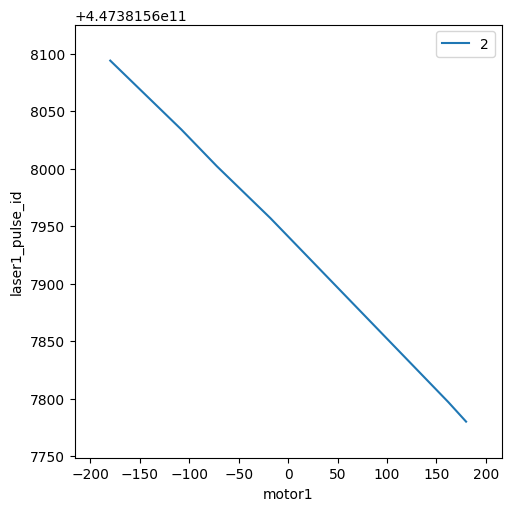

In [8]:
uids = RE(scan([det,laser1], motor1, 180, -180, 21))

Now we stop the scan and are presented with various options. We choose to resume the scan which will continue from its last checkpoint.

In [9]:
RE.resume()

TransitionError: The RunEngine is the idle state. You can only resume for the paused state.

In this next demonstration we customise the behaviour of the scan to take multiple images at each point in the scan.



Transient Scan ID: 4     Time: 2024-04-12 14:57:51
Persistent Unique Scan ID: '4ea7428e-2b71-4782-9e29-80dc010a0ca5'
New stream: 'primary'
+-----------+------------+------------+-----------------+
|   seq_num |       time |     motor1 | laser1_pulse_id |
+-----------+------------+------------+-----------------+
|         1 | 14:58:14.7 |   -180.000 |    447381572160 |
|         2 | 14:58:14.9 |   -180.000 |    447381572163 |
|         3 | 14:58:15.1 |   -180.000 |    447381572165 |
|         4 | 14:58:15.3 |   -180.000 |    447381572167 |
|         5 | 14:58:15.5 |   -180.000 |    447381572169 |
|         6 | 14:58:20.4 |   -108.000 |    447381572218 |
|         7 | 14:58:20.6 |   -108.000 |    447381572220 |
|         8 | 14:58:20.8 |   -108.000 |    447381572222 |
|         9 | 14:58:21.0 |   -108.000 |    447381572224 |
|        10 | 14:58:21.2 |   -108.000 |    447381572226 |
|        11 | 14:58:26.1 |    -36.000 |    447381572275 |
|        12 | 14:58:26.3 |    -36.000 |    4473

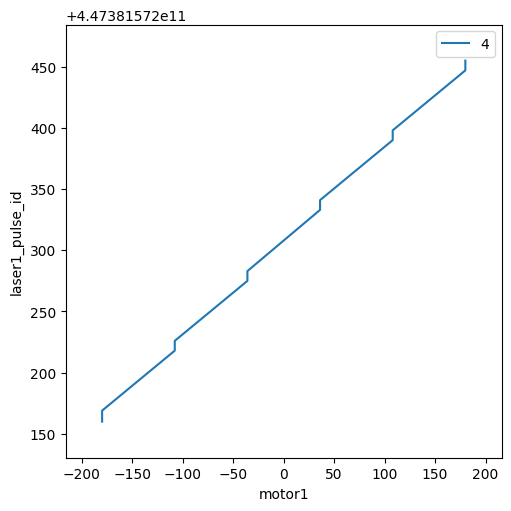

In [11]:
uids = RE(scan([det,laser1], motor1, -180, 180, 6, per_step=partial(repeating_step,repeats=5)))

In [ ]:
RE(count([laser1, det], 1))

In [ ]:
catalog[-1].metadata["start"]